# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = '400110154'
full_name = 'Sina Namazi'
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
#TODO
data_path = 'nutrition.csv'
data = pd.read_csv(data_path, index_col='ID')
print(len(data))
data.head()

8618


,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
#TODO
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FoodGroup         8618 non-null   object 
 1   ShortDescrip      8618 non-null   object 
 2   Descrip           8618 non-null   object 
 3   CommonName        1063 non-null   object 
 4   MfgName           1560 non-null   object 
 5   ScientificName    732 non-null    object 
 6   Energy_kcal       8618 non-null   float64
 7   Protein_g         8618 non-null   float64
 8   Fat_g             8618 non-null   float64
 9   Carb_g            8618 non-null   float64
 10  Sugar_g           8618 non-null   float64
 11  Fiber_g           8618 non-null   float64
 12  VitA_mcg          8618 non-null   float64
 13  VitB6_mg          8618 non-null   float64
 14  VitB12_mcg        8618 non-null   float64
 15  VitC_mg           8618 non-null   float64
 16  VitE_mg           8618 non-null   float64
 

Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
#TODO
data = data.select_dtypes(include=['float64', 'int64'])
data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

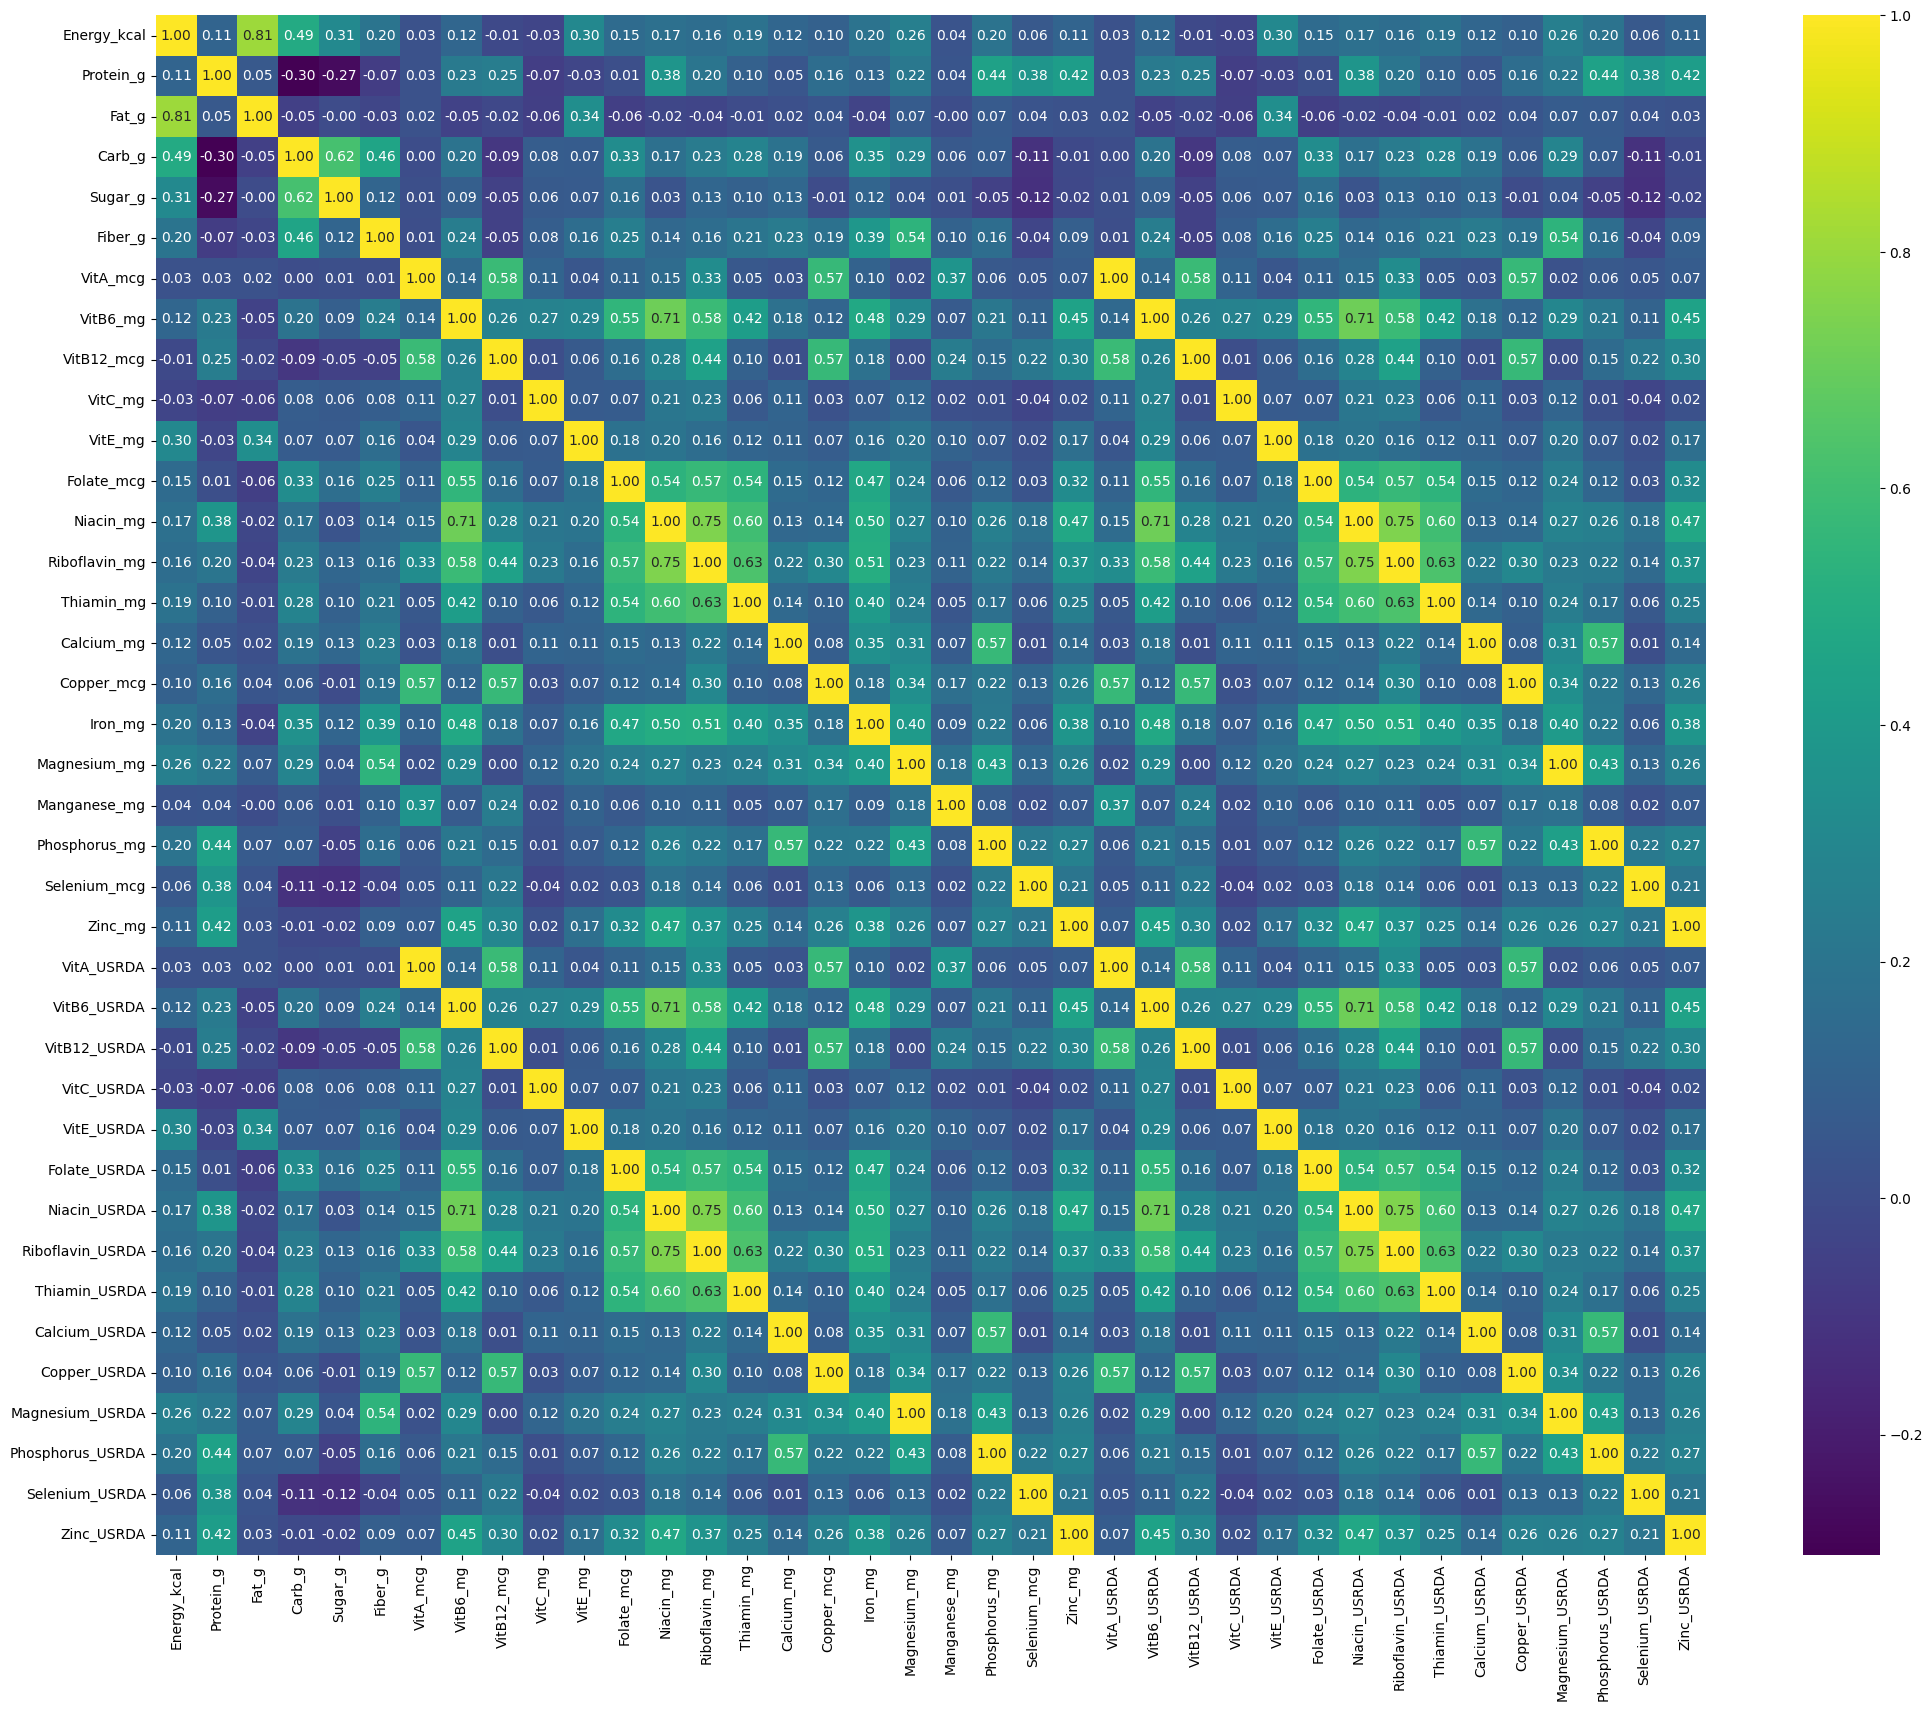

In [6]:
#TODO
corr = data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

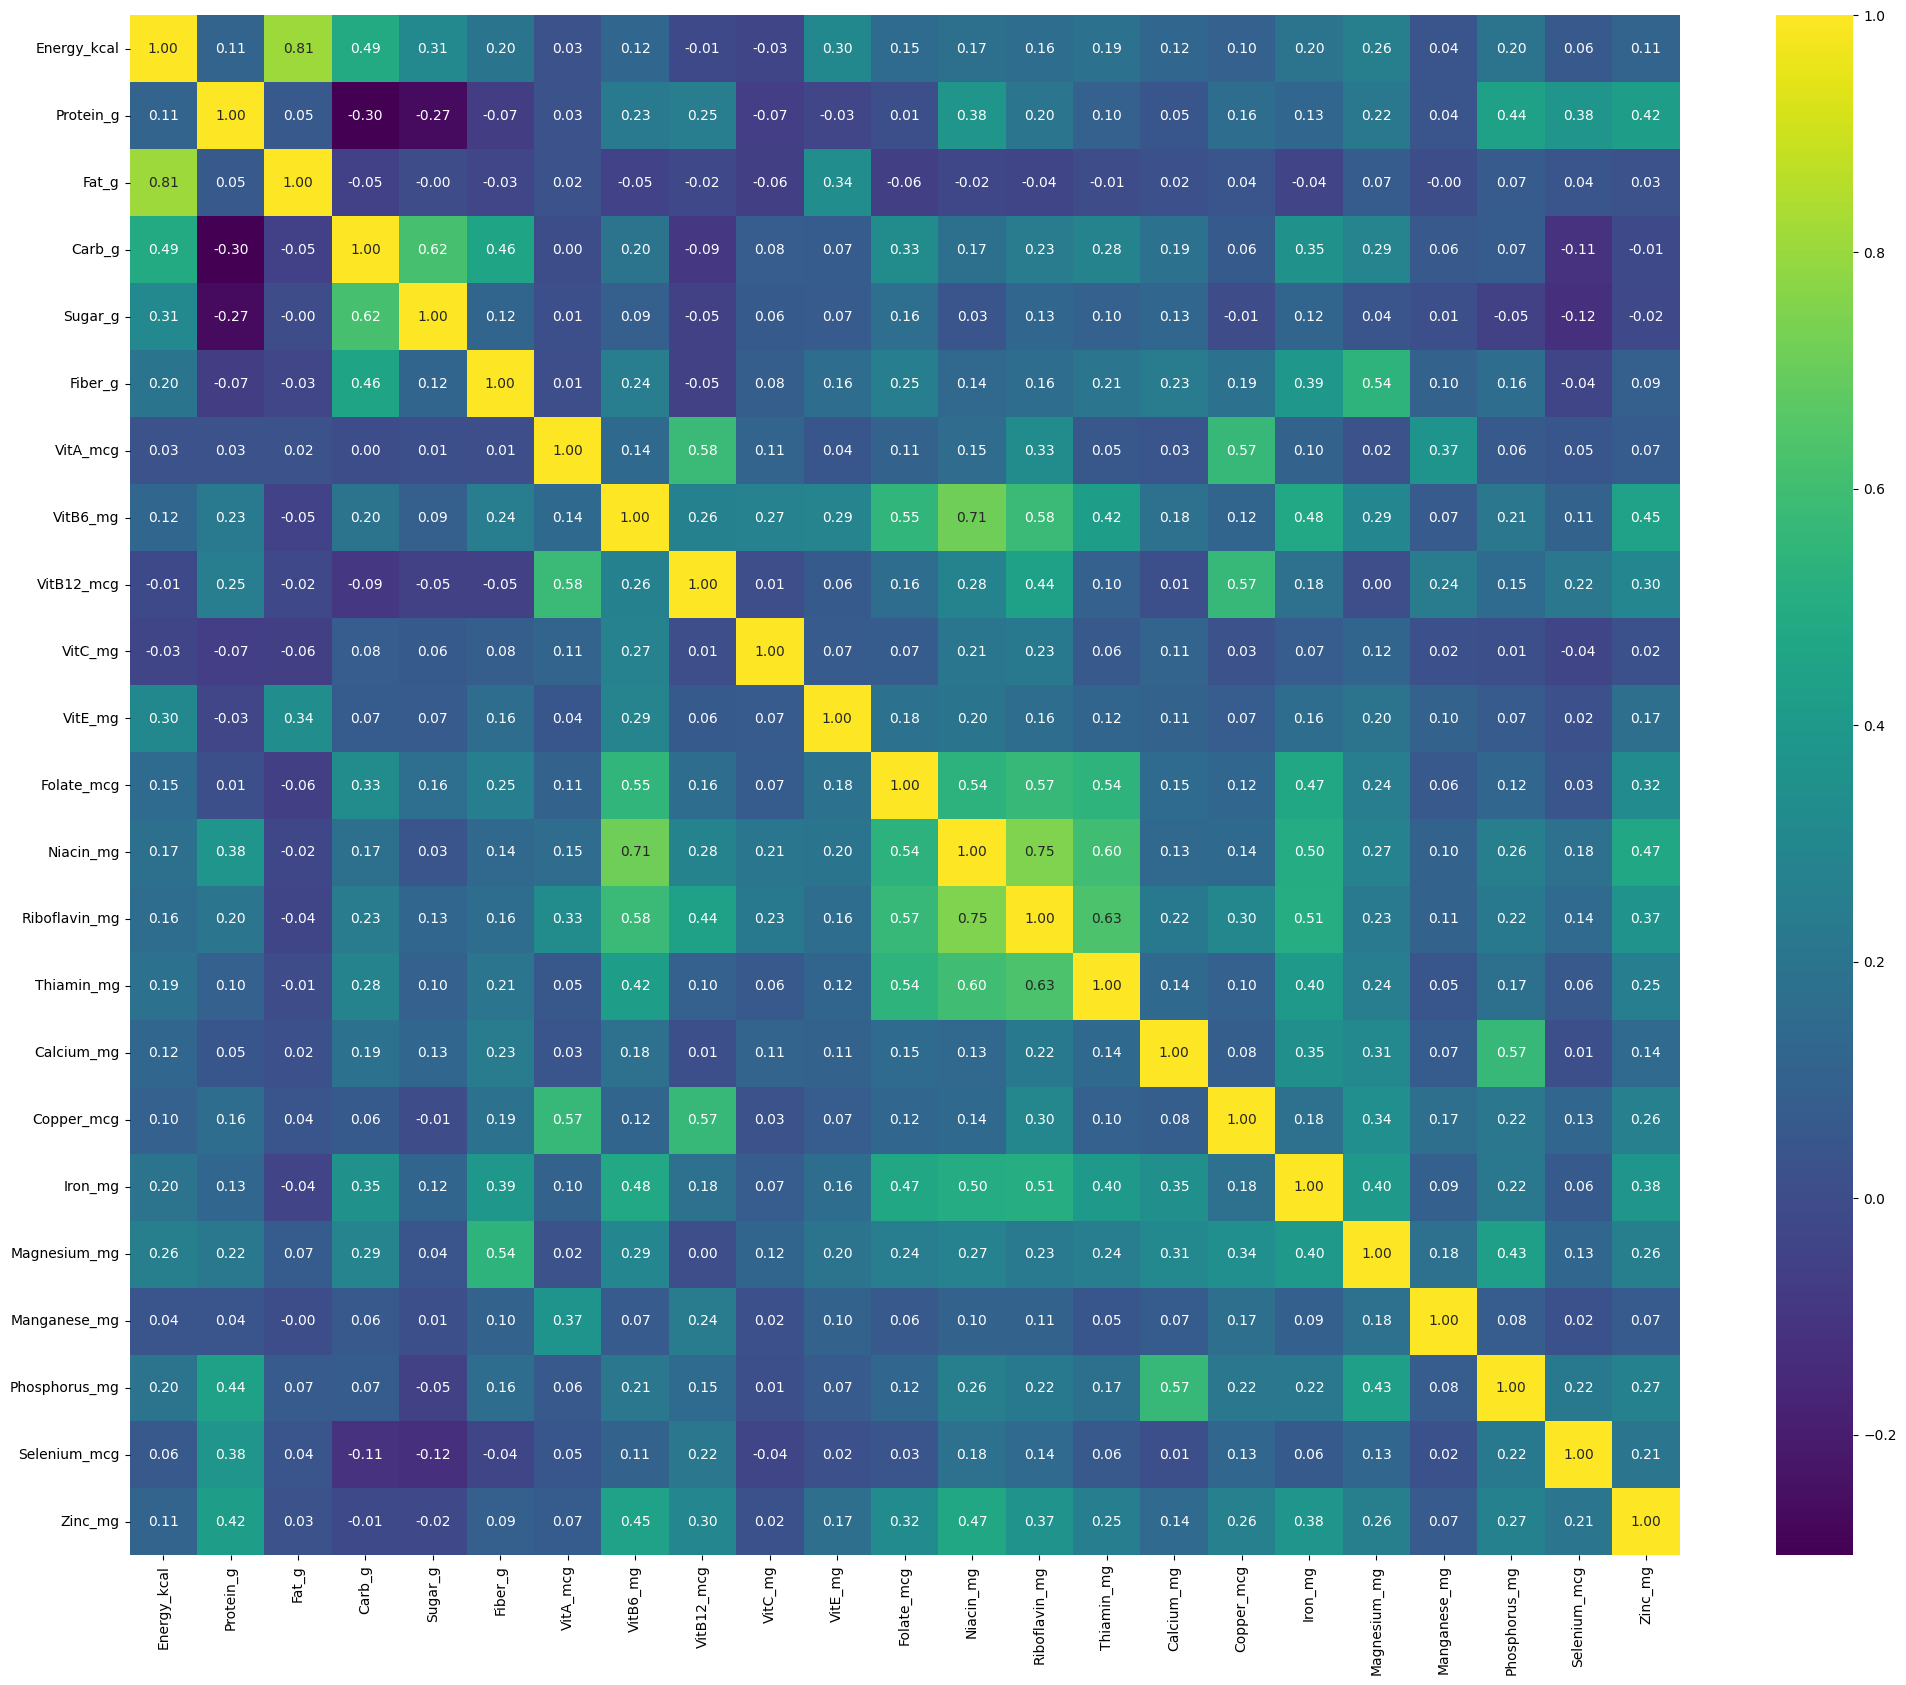

In [7]:
#TODO
threshold = 0.9
corr_matrix = data.corr()
drop_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            column = corr_matrix.columns[i]
            drop_columns.add(column)

data = data.drop(columns=drop_columns)
corr = data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

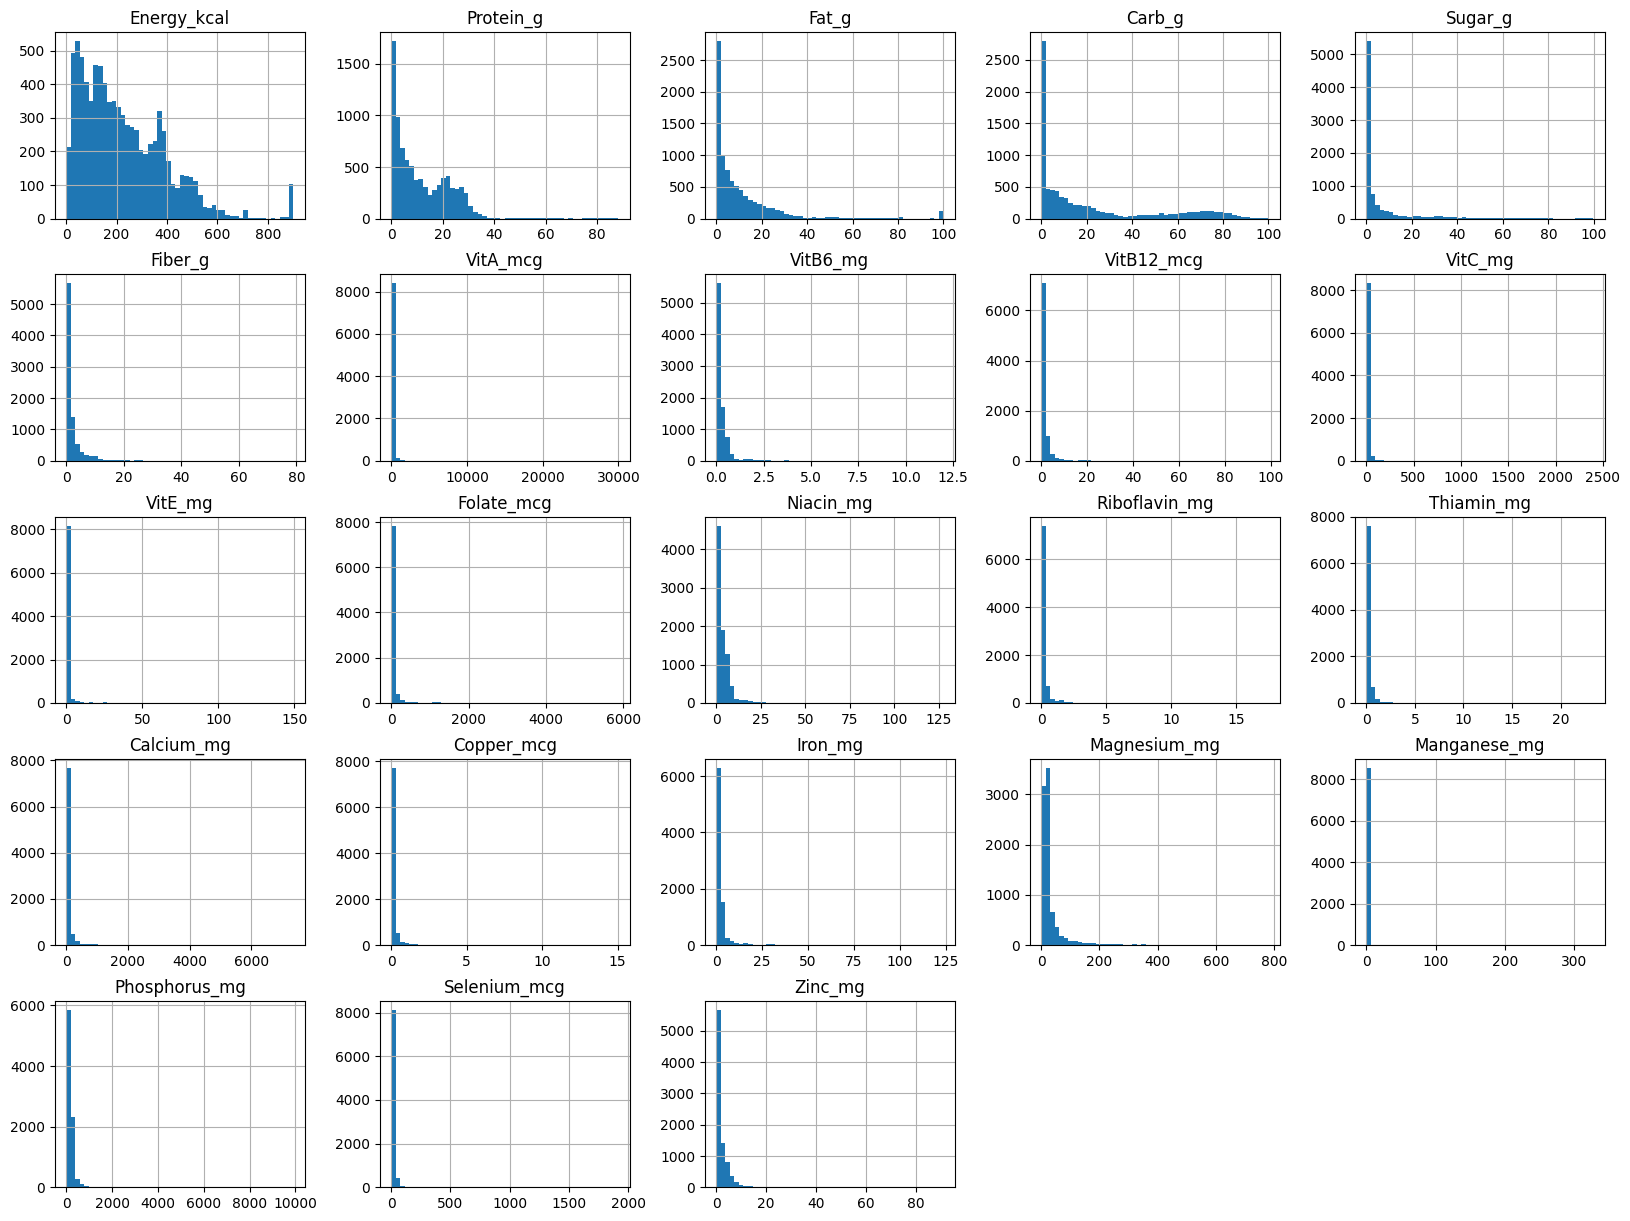

In [8]:
#TODO
data.hist(bins=50, figsize=(20, 15))
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [9]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = data
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

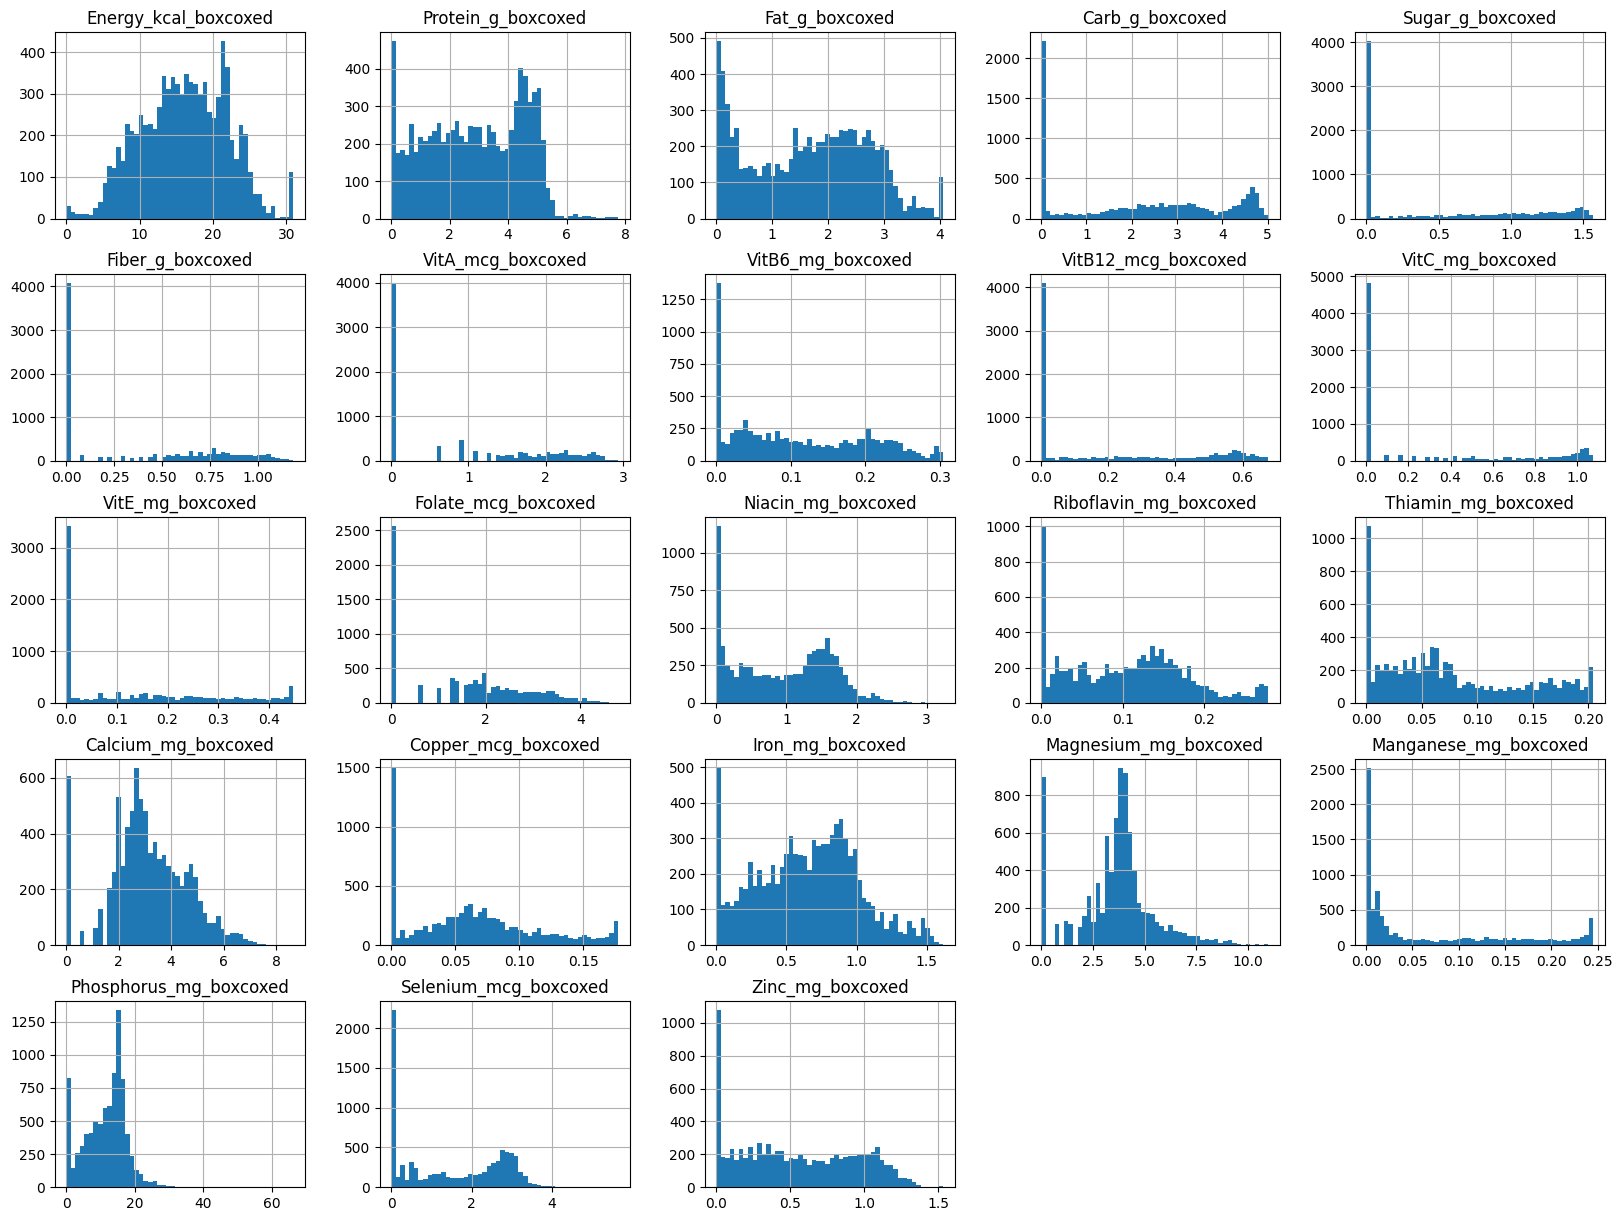

In [10]:
#TODO
df_boxcoxed.hist(bins=50, figsize=(20, 15))
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
#TODO
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_boxcoxed)
data_scaled = pd.DataFrame(data_scaled, columns=df_boxcoxed.columns)
print(f'Total mean: {round(data_scaled.values.mean(), 1)}')
print(f'Total standard deviation: {round(data_scaled.values.std(), 1)}')

Total mean: 0.0
Total standard deviation: 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]
        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)
    
    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
    
    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [13]:
#TODO
pca = CustomPCA(n_components=data_scaled.shape[1])
pca.fit(data_scaled)
pca_result = pca.transform(data_scaled)
explained_variances = pca.get_explained_variance_ratio()
components = pca.get_components()

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.

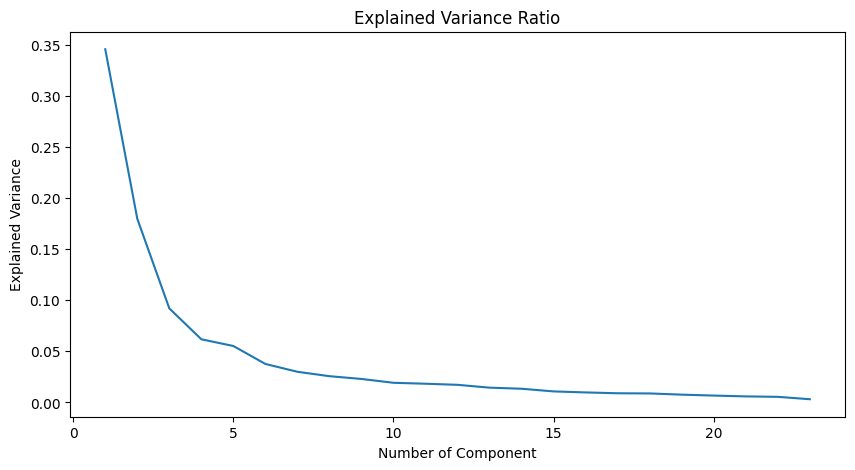

In [14]:
#TODO
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variances) + 1), explained_variances)
plt.xlabel('Number of Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

therefore we are going to pick 5 components

In [15]:
#TODO
#print the total explained variance ration for the first 5 components
print(f'Total explained variance ratio for the first 5 components: {explained_variances[:5].sum()}')

Total explained variance ratio for the first 5 components: 0.734238306514695


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [16]:
#TODO
data_pca = pd.DataFrame(pca_result[:, :5], columns=[f'PC{i+1}' for i in range(5)], index=data.index)
original_data = pd.read_csv(data_path, index_col='ID')
data_pca['FoodGroup'] = original_data['FoodGroup']
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
ID,,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products
1002,-2.537931,-1.550464,1.279816,3.634066,2.492683,Dairy and Egg Products
1003,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products
1004,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products
1005,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [17]:
#TODO
corr = data_pca[[f'PC{i+1}' for i in range(5)]].corr()
corr.style.format("{:.1f}")

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,0.0,-0.0,-0.0,-0.0
PC2,0.0,1.0,-0.0,-0.0,-0.0
PC3,-0.0,-0.0,1.0,-0.0,0.0
PC4,-0.0,-0.0,-0.0,1.0,-0.0
PC5,-0.0,-0.0,0.0,-0.0,1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [18]:
# TODO
components = pca.get_components()

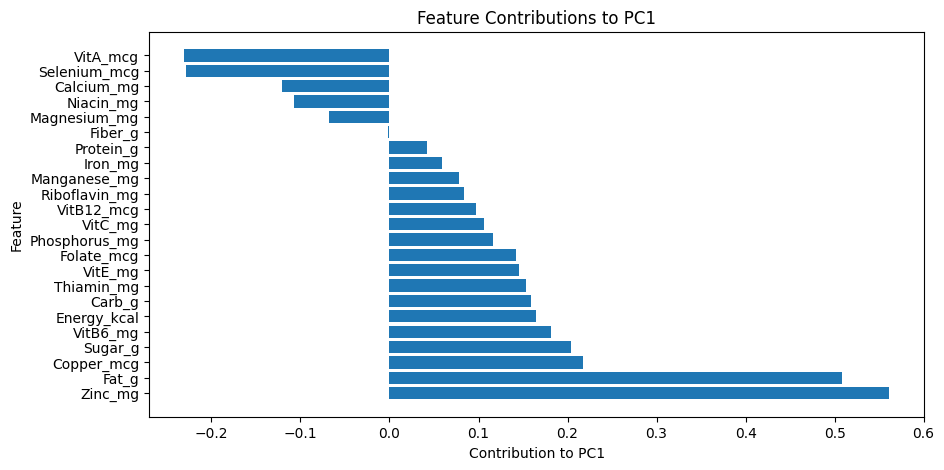

In [19]:
#TODO
idx = np.argsort(components[0] * -1)
features = data.columns[idx]
plt.figure(figsize=(10, 5))
plt.barh(data.columns[idx], components[0][idx])
plt.xlabel('Contribution to PC1')
plt.ylabel('Feature')
plt.title('Feature Contributions to PC1')
plt.show()

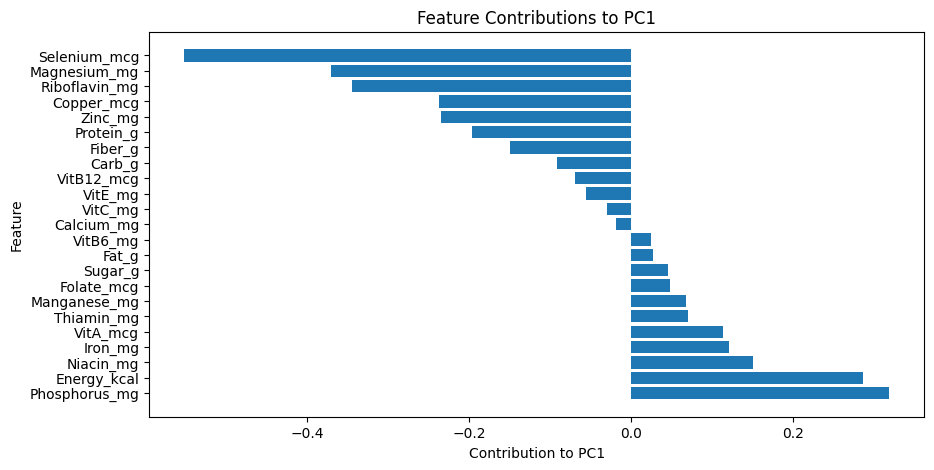

In [20]:
#TODO
idx = np.argsort(components[1] * -1)
features = data.columns[idx]
plt.figure(figsize=(10, 5))
plt.barh(data.columns[idx], components[1][idx])
plt.xlabel('Contribution to PC1')
plt.ylabel('Feature')
plt.title('Feature Contributions to PC1')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">

These plots display the contributions of various features to the first principal component (PC1) and the second principal component (PC2) in a Principal Component Analysis (PCA). 


- **PC1** captures the variation in the data mainly due to the differences in Zinc, Fat, Copper, and Sugar content, in contrast to Vitamin A and Selenium.
- **PC2** differentiates primarily based on Selenium content, along with contributions from Magnesium, Riboflavin, Copper, and Zinc, and contrasts these against Phosphorus and Energy content.

These components help in reducing the dimensionality of the dataset while retaining the variance that differentiates the observations based on their nutritional content.

</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

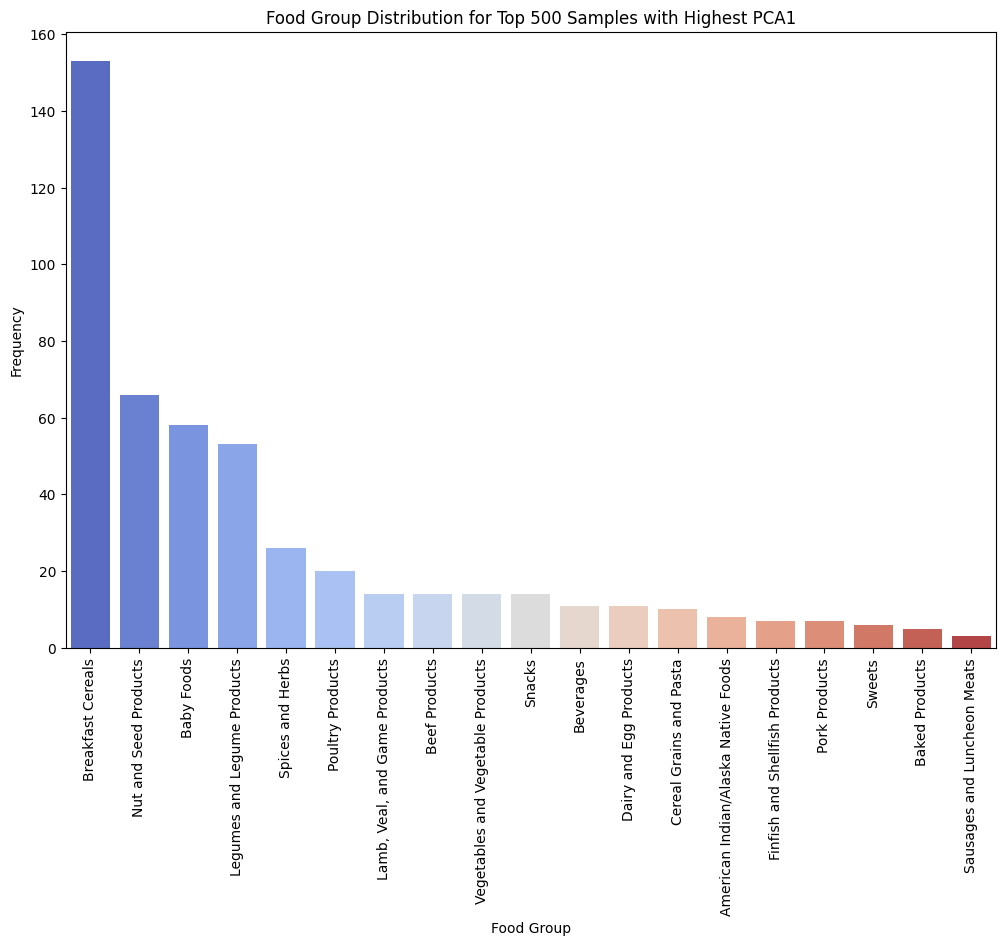

In [21]:
#TODO
data_pca_abs = data_pca.copy()
data_pca_abs[data_pca_abs.columns[:-1]] = np.abs(data_pca_abs[data_pca_abs.columns[:-1]])
top_500_idx = data_pca['PC1'].sort_values(ascending=False).head(500).index
top_500_data = data_pca.loc[top_500_idx]

plt.figure(figsize=(12, 8))
sns.countplot(x='FoodGroup', data=top_500_data, palette='coolwarm', order=top_500_data['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA1')
plt.ylabel('Frequency')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

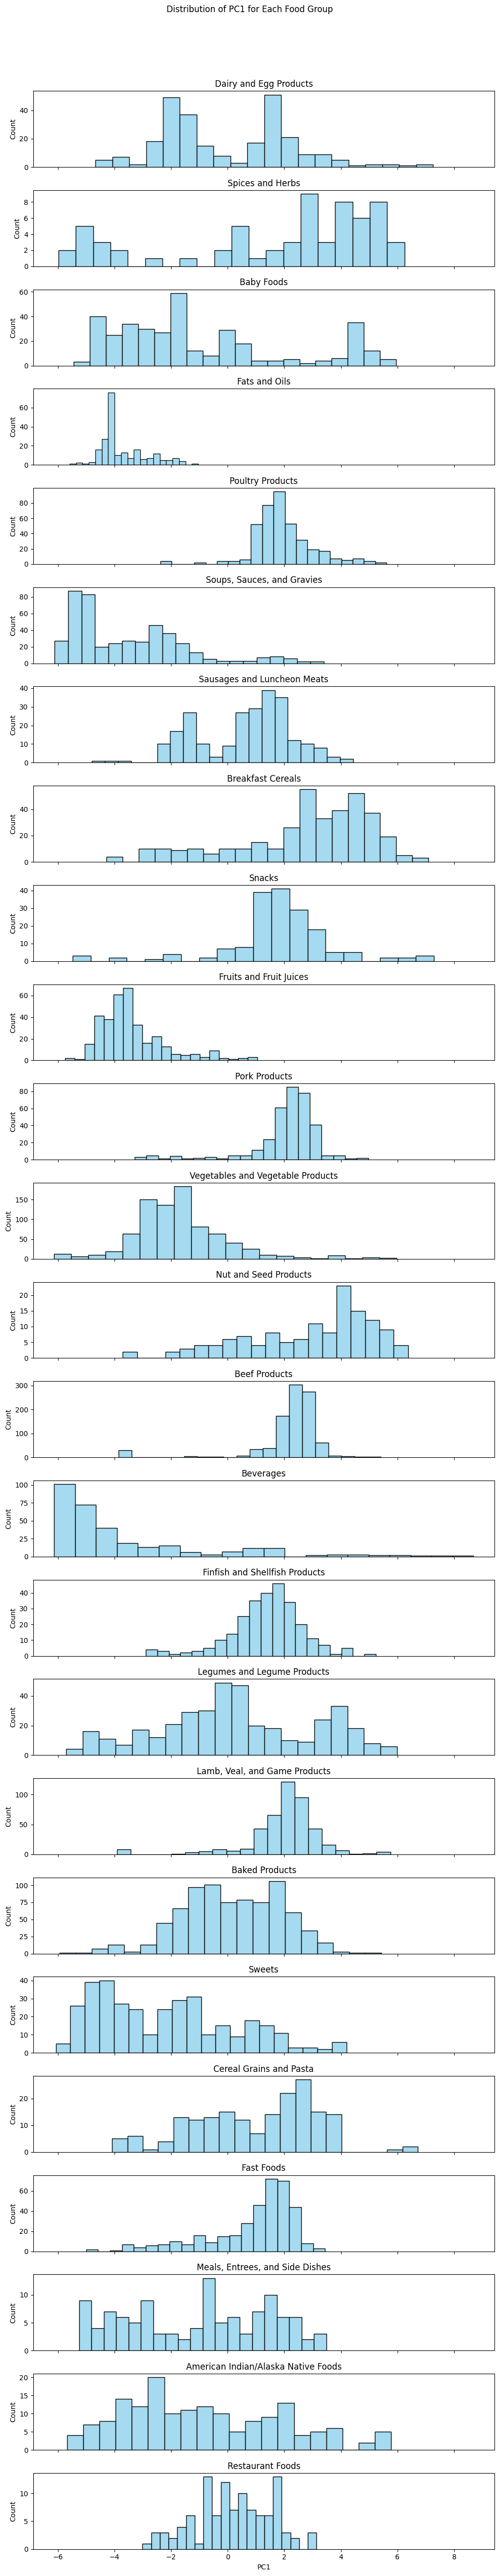

In [22]:
#TODO
food_groups = data_pca['FoodGroup'].unique()
num_food_groups = len(food_groups)

fig, axes = plt.subplots(num_food_groups, 1, figsize=(10, 2*num_food_groups), sharex=True)

for ax, food_group in zip(axes, food_groups):
    sns.histplot(data_pca.loc[data_pca['FoodGroup'] == food_group, 'PC1'], bins=20, ax=ax, kde=False, color='skyblue')
    ax.set_title(food_group)
    ax.set_ylabel('Count')

plt.xlabel('PC1')
plt.suptitle('Distribution of PC1 for Each Food Group', y=1.02)
plt.tight_layout()
plt.show()


Do the same for pca2.

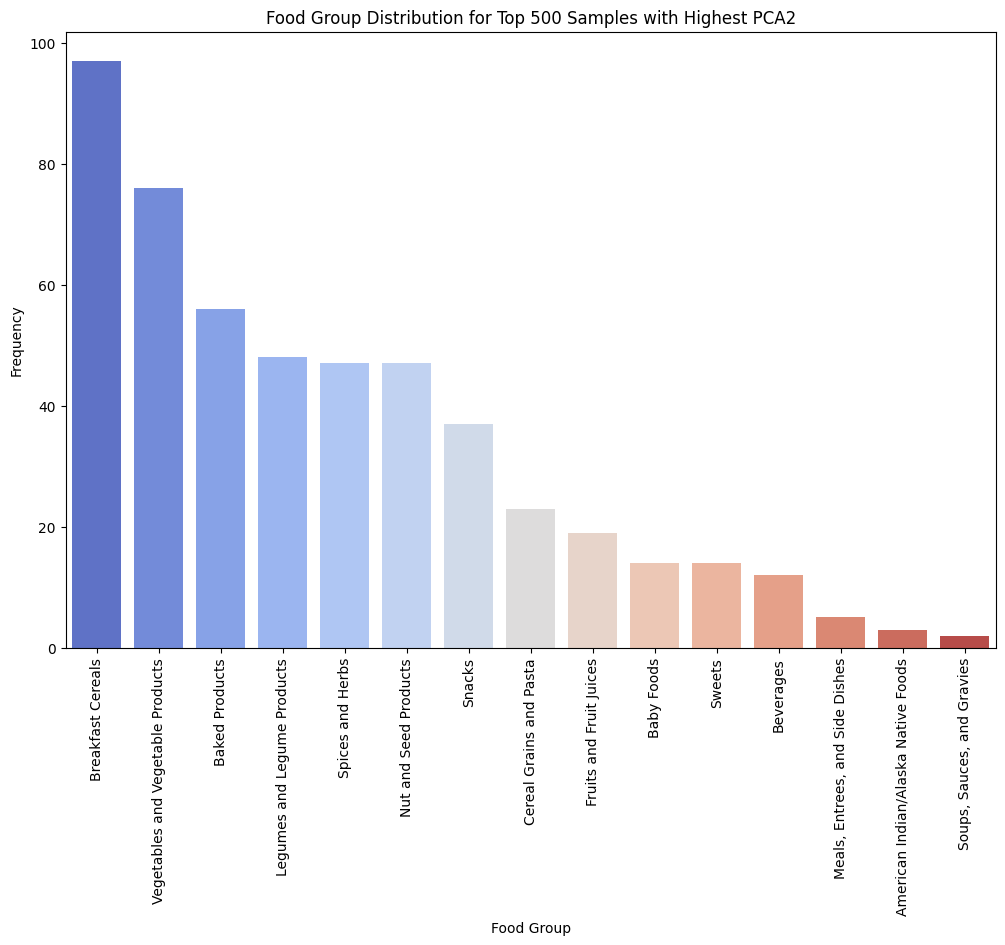

In [23]:
#TODO
data_pca_abs = data_pca.copy()
data_pca_abs[data_pca_abs.columns[:-1]] = np.abs(data_pca_abs[data_pca_abs.columns[:-1]])
top_500_idx = data_pca['PC2'].sort_values(ascending=False).head(500).index
top_500_data = data_pca.loc[top_500_idx]

plt.figure(figsize=(12, 8))
sns.countplot(x='FoodGroup', data=top_500_data, palette='coolwarm', order=top_500_data['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA2')
plt.ylabel('Frequency')
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.show()

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

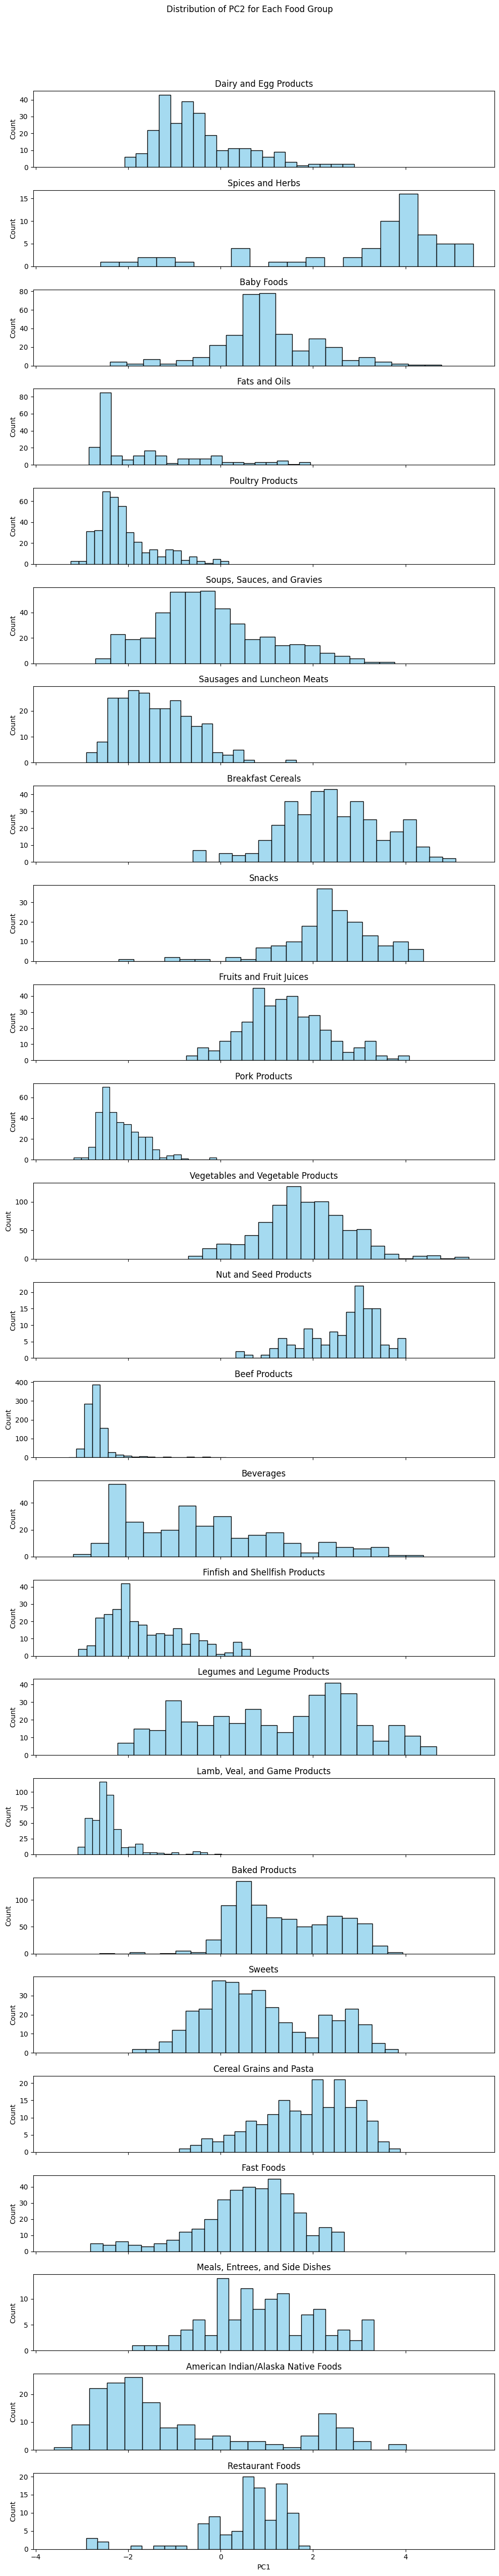

In [24]:
#TODO
food_groups = data_pca['FoodGroup'].unique()
num_food_groups = len(food_groups)

fig, axes = plt.subplots(num_food_groups, 1, figsize=(10, 2*num_food_groups), sharex=True)

for ax, food_group in zip(axes, food_groups):
    sns.histplot(data_pca.loc[data_pca['FoodGroup'] == food_group, 'PC2'], bins=20, ax=ax, kde=False, color='skyblue')
    ax.set_title(food_group)
    ax.set_ylabel('Count')

plt.xlabel('PC1')
plt.suptitle('Distribution of PC2 for Each Food Group', y=1.02)
plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


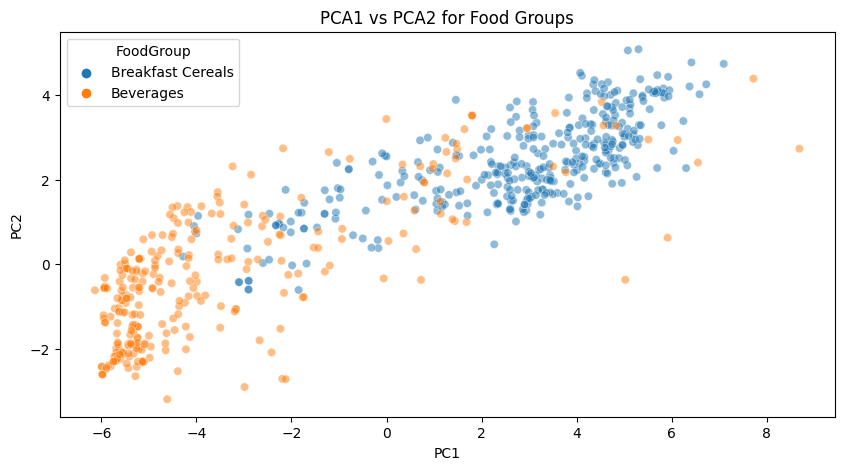

In [25]:
#TODO
filtered_data = data_pca[data_pca['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=filtered_data, hue='FoodGroup', alpha=0.5)
plt.title('PCA1 vs PCA2 for Food Groups')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
The plots provide insights into the distribution of different food groups along the first two principal components (PC1 and PC2):

- **PC1** is strongly influenced by **Breakfast Cereals**, **Nut and Seed Products**, and **Baby Foods**. This component might be capturing characteristics common to these food groups, such as nutrient density or common usage in diets.
- **PC2** is also influenced by **Breakfast Cereals** but shows stronger contributions from **Vegetables and Vegetable Products** and **Baked Products**. This component might be capturing dietary variety or preparation methods.
- The histograms provide a detailed view of how each food group's influence is distributed across PC2 and PC1, highlighting variability within food groups.

Understanding these components helps in interpreting the dimensions along which these food groups vary the most, which could be crucial for further analysis, such as dietary studies or food classification tasks.

</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">

In the last plot, we can see that the two food groups are separated from each other. PC1 is represented by the x-axis, we can observe that beverage data points are mostly on the left side of the plot, while breakfast cereals are mostly on the right side. This is consistent with the distribution of PC1 for each food group. We can see that the distribution of PC1 for beverages is mostly on the left side of the plot, while the distribution of PC1 for breakfast cereals is mostly on the right side. This indicates that PC1 is a good feature to separate these two food groups.

</span>

